In this tutorial we explore the **Ydata-profiling** Python package, formely known as **pandas-profiling**. It's a useful package to quickly inpect new data, perform exploratory data analysis and more generally for data profiling.

The tutorial was inspired by the [official documentation](https://ydata-profiling.ydata.ai/docs/master/index.html).

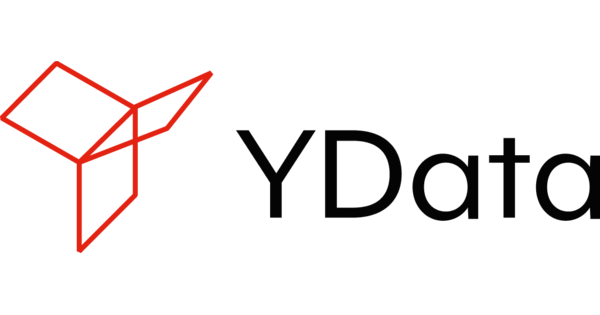

# Package imports

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport, compare
import numpy as np

## Titanic dataset

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Creating a data profile

It's very easy to create a profile report for your data and there are a couple of different ways you can do it.


## Different ways of creating a profile

In [4]:
profile = ProfileReport(titanic, title="Titanic data")

In [5]:
profile = titanic.profile_report()

In [6]:
profile = ProfileReport()
profile.df = titanic
profile.title = "Titanic data"

## Different ways of visualising a profile

Similarly, you can visualise the data profiling results in different ways, within your jupyter notebook or by storing them as an HTML file.

You get different types of alerts, which are describe in the [docs](https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/concepts.html).

### Creating an html file

In [7]:
profile.to_file("titanic.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/anasofiapinto/opt/anaconda3/envs/data_quality/lib/python3.9/site-packages/ydata_profiling/model/pandas/correlations_pandas.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.corr(method="spearman")
/Users/anasofiapinto/opt/anaconda3/envs/data_quality/lib/python3.9/site-packages/ydata_profiling/model/pandas/correlations_pandas.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.corr(method="pearson")


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Widgets within a jupyter notebook

In [8]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### An html report embedded in your jupyter notebook

In [9]:
profile.to_notebook_iframe()

# Profiling large datasets

Large datasets can be lead to expensive computations, but there are still ways we can create a data profile for large datasets.

## Minimal mode

When setting `minimal=True`, the most expensive computations are turned off by default.

In [10]:
profile = ProfileReport(titanic, title ="Titanic data (minimal profiling)", minimal=True)
profile.to_file("titanic_minimal.html")

## Sampling the data

Alternatively you can sample your data and provide a disclaimer in your report.

In [11]:
description = "Disclaimer: this profiling report was generated using a sample of 10% of the original dataset."
sample = titanic.sample(frac=0.1)

profile = sample.profile_report(dataset={"description": description}, minimal=True)
profile.to_file("titanic_minimal_description.html")

In [12]:
titanic

## Only allow expensive computations for a set of variables

Another alternative is to only allow expensive computations to happen for a certain number of variables

In [13]:
# We start by creating the profile without specifying the data source and we configure it
profile = ProfileReport()
profile.config.interactions.targets = ["sex", "age", "fare"]

# We then assign the dataset
profile.df = titanic
profile.to_file("titanic_interactions_defined.html")

# Spark
`ydata-profiling` now supports Spark Dataframes profiling. To know more [read this Medium blog post](https://medium.com/the-techlife/the-1-python-package-to-profile-your-spark-dataframes-89b09e37eeb9).

# Handling sensitive data

If you set `sensitive=True`, only aggregate information is provided in the report and no individual records are shown.

According to the [data docs](https://ydata-profiling.ydata.ai/docs/master/pages/use_cases/sensitive_data.html) `ydata-profiling` does not send data to external services, making it suitable for private/sensitive data.

In [14]:
profile = titanic.profile_report(sensitive=True)
profile.to_file("titanic_sensitive.html")

## Not showing a sample or duplicates info

In [15]:
profile = titanic.profile_report(duplicates=None, samples=None)
profile.to_file("titanic_no_duplicates_no_samples.html")

## Showing a sample consisting of mock/synthetic data
Alternatively, you can show mock/synthetic data in the dataset sample sections by passing a `sample` dictionary. Note that the `name` and `caption` keys are optional.

In [16]:
# the row below needs to be replaced by actual mock data
mock_data = titanic[10:20].reset_index(drop=True)

mock_data_description = "Disclaimer: the following sample consists of mock data."

profile = titanic.profile_report(
    sample={
        "name": "A sample of mock data",
        "data": mock_data,
        "caption": mock_data_description,
    }
)

profile.to_file("titanic_no_duplicates_no_samples.html")

# Comparing datasets

`ydata-profiling` can also be used to compare multiple datasets/multiple versions of the same dataset. Examples of use cases are:
- The same data batch shared by partners in different times;
- The same data source, but data from different time periods;
- Training vs validation vs test sets in machine learning.

In [17]:
len(titanic)*0.8

In [18]:
train_df = titanic[:713]
train_report = ProfileReport(train_df, title="Train")

test_df = titanic[713:]
test_report = ProfileReport(test_df, title="Test")

train_vs_test = train_report.compare(test_report)
train_vs_test.to_file("train_vs_test.html")

When comparing multiple datasets:

In [19]:
validation_df = titanic[100:200]
validation_report = ProfileReport(validation_df, title="Validation")

In [20]:
comparison_report = compare([train_report, validation_report, test_report])

comparison_report.to_file("train_test_validation.html")

# Adding metadata to your report

You can customise your data profiling report by:
- adding general information about what the report is showing;
- add column descriptions/metadata;
- changing its appearance.

## General information

In [21]:
profile = titanic.profile_report(
    title="TITLE",
    dataset={
        "description": "This profiling report shows the X data profile",
        "copyright_holder": "Nesta UK",
        "copyright_year": 2023,
        "url": "https://www.nesta.org.uk/",
    },
)

profile.to_file("titanic_with_description.html")

## Column descriptions
These will appear in the overview section.

In [22]:
variables={
        "descriptions": {
            "files": "Files in the filesystem, # variable name: variable description",
            "datec": "Creation date",
            "datem": "Modification date",
        }
    }

In [23]:
metadata = {"passenger_id":"Unique identifier for passenger", "age": "Age of passenger"}

profile = titanic.profile_report(variables={"descriptions": metadata})

profile.to_file('titanic_var_metadata.html')

## Customising the appearance of your report

You can customise: the theme, the visualisations and the colour paletts.

More informtion here: https://ydata-profiling.ydata.ai/docs/master/pages/use_cases/custom_report_appearance.html

# A few issues I have come across..

- Doesn't deal well with values that are lists, dictionaries, etc so it's better to remove them from the data profiling;
- The widgests don't always render... so I always prefer to save the html file;
- When computing the full report (instead of minimal), it can sometimes reach a RuntimeError for no apparent reason.